In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel("/Users/felixlaw/Personal_Projects-1/Jasmine's FYP/ML dataset sample.xlsx",header=1)
df = df.drop(columns= df.columns[:1]  , index=0)
df = df.drop(columns= df.columns[-1:] )
# df = df[df['Curing days (d)'] == 28]
df = df.replace(np.nan, 0)
df

,Natural moisture content,Sand,Silt,Clay,Specific Gravity,Max dry density,Optimum water content,Liquid Limit (%),Plastic Limit (%),SiO2,...,Total dosage,SiO2.1,Al2O3.1,CaO.1,Fe2O3.1,MgO.1,SO3.1,NaOH,UCS,Curing days (d)
1,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,28.2800,13.7800,43.040,0.4900,7.0200,4.230,0,0.0000,7.0
2,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,27.0295,13.1675,44.029,0.4655,6.7155,4.044,0,0.0000,7.0
3,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,25.7790,12.5550,45.018,0.4410,6.4110,3.858,0,0.0350,7.0
4,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,24.5285,11.9425,46.007,0.4165,6.1065,3.672,0,0.0625,7.0
5,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,23.2780,11.3300,46.996,0.3920,5.8020,3.486,0,0.0750,7.0
6,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,22.0275,10.7175,47.985,0.3675,5.4975,3.300,0,0.0750,7.0
7,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,20.7770,10.1050,48.974,0.3430,5.1930,3.114,0,0.0625,7.0
8,100,0,0,0,2.72,0,0,60.0,23.6,0,...,9.411765,28.2800,13.7800,43.040,0.4900,7.0200,4.230,0,0.0000,7.0
9,100,0,0,0,2.72,0,0,60.0,23.6,0,...,9.411765,27.0295,13.1675,44.029,0.4655,6.7155,4.044,0,0.0000,7.0
10,100,0,0,0,2.72,0,0,60.0,23.6,0,...,9.411765,25.7790,12.5550,45.018,0.4410,6.4110,3.858,0,0.0700,7.0


In [2]:
df.columns

Index(['Natural moisture content', 'Sand', 'Silt', 'Clay ', 'Specific Gravity',
       'Max dry density', 'Optimum water content', 'Liquid Limit (%)',
       'Plastic Limit (%)', 'SiO2', 'Al2O3', 'CaO', 'Fe2O3', 'MgO', 'SO3',
       'Ignition loss (%)', 'Original', 'Total treated water content',
       'GGBS dosage', 'OPC dosage', 'Quicklime dosage', 'Fly ash dosage',
       'Carbide sludge dosage', 'Total dosage ', 'SiO2.1', 'Al2O3.1', 'CaO.1',
       'Fe2O3.1', 'MgO.1', 'SO3.1', 'NaOH', 'UCS', 'Curing days (d)'],
      dtype='object')

In [3]:
# Setup X and y variables
input_names = ['Natural moisture content', 'Sand', 'Silt', 'Clay ', 'Specific Gravity',
         'Liquid Limit (%)',
       'Plastic Limit (%)', 'SiO2', 'Al2O3', 'CaO', 'Fe2O3', 'MgO', 'SO3',
       'Ignition loss (%)', 'Original', 'Total treated water content',
        'SiO2.1', 'Al2O3.1', 'CaO.1',
       'Fe2O3.1', 'MgO.1', 'SO3.1', 'NaOH', 'UCS', 'Curing days (d)']

X = df[input_names].values

output_names = ['UCS', 'GGBS dosage', 'Total dosage ']

y = df[output_names].values
# print(y)
# y = df['UCS'].values
print(y[0])
print(len(X))

[0.         7.05882353 7.05882353]
41


Reference from: https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

In [4]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

In [5]:
# Data Splitting
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# X_train = 
# X_test = 
# y_train = 
# y_test = 


print(y_test)
print(len(y_test))



[[0.65       0.68421053 1.        ]
 [0.24       0.36842105 1.        ]
 [0.         0.89473684 1.        ]
 [0.8        0.57894737 1.        ]
 [0.15       0.15789474 0.        ]
 [0.62       0.47368421 1.        ]
 [0.39       0.07894737 0.        ]
 [0.76       0.57894737 1.        ]
 [0.232      0.39473684 0.        ]]
9


In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Building NN 
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=len(input_names), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(output_names)))
# model.add(Dense(1))

/Users/felixlaw/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Setting up the Loss Function and Optimizer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,019 (23.51 KB)

 Trainable params: 6,019 (23.51 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model 
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)

# Print the evaluation result
print("Test Loss:", loss)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step - loss: 0.4368 - mean_squared_error: 0.4368 - val_loss: 0.5097 - val_mean_squared_error: 0.5097
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4057 - mean_squared_error: 0.4057 - val_loss: 0.4698 - val_mean_squared_error: 0.4698
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3769 - mean_squared_error: 0.3769 - val_loss: 0.4326 - val_mean_squared_error: 0.4326
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3506 - mean_squared_error: 0.3506 - val_loss: 0.3981 - val_mean_squared_error: 0.3981
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3257 - mean_squared_error: 0.3257 - val_loss: 0.3665 - val_mean_squared_error: 0.3665
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3025 - mean_squared_error: 0.3025 - val_loss: 0.3381 - val_mean_squared_error: 0.3381
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2809 - mean_squared_error: 0.2809 - val_loss: 0.3124 - val_mean_square

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


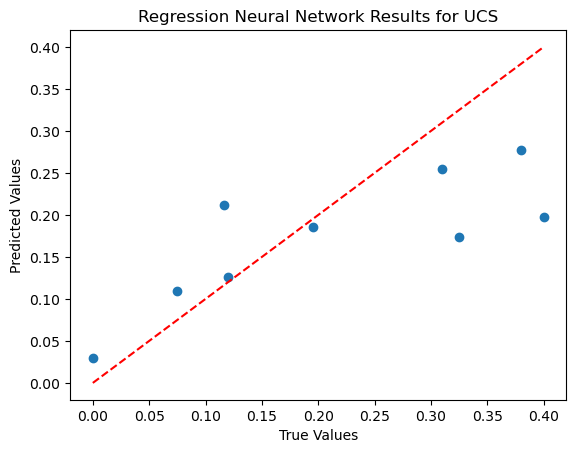

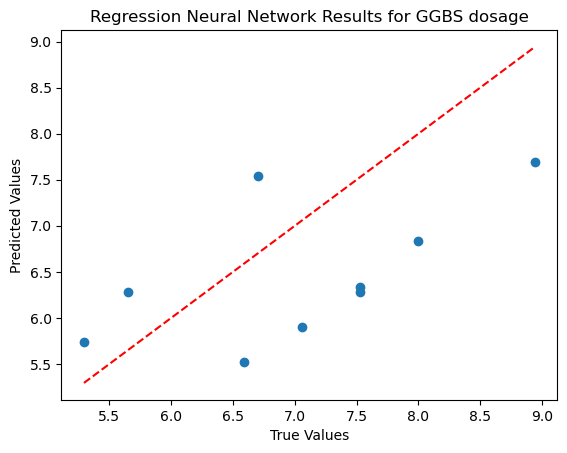

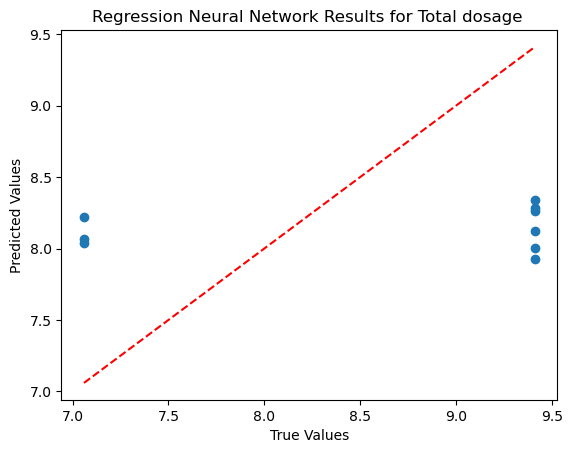

In [11]:
import matplotlib.pyplot as plt


# Assuming you have the true values stored in y_true and the predicted values stored in y_pred
y_pred = model.predict(X_test)

y_pred = sc.inverse_transform(y_pred)

y_test = sc.inverse_transform(y_test)

for i in range(len(y_pred[0])): 

    # y_pred_one_var = y_pred.T
    # y_test_one_var = y_test.T

    y_pred_one_var = y_pred.T[i]

    y_test_one_var = y_test.T[i]

    # Create a scatter plot or line plot
    plt.scatter(y_test_one_var, y_pred_one_var)  # or plt.plot(y_test_one_var, y_pred_one_var, 'bo')

    # Add labels and title
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Regression Neural Network Results for {output_names[i]}')

    # Add a diagonal line for reference (perfect predictions)
    plt.plot([min(y_test_one_var), max(y_test_one_var)], [min(y_test_one_var), max(y_test_one_var)], 'r--')  # diagonal line

    # Show the plot
    plt.show()

In [12]:
#! Tesing on the testing dataset USELESS FOR REGRESSION
# from sklearn.metrics import accuracy_score
# y_pred = model.predict(X_test)
# a = accuracy_score(y_pred,y_test)
# print('Accuracy is:', a*100)

In [13]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=30)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 37.9115 - val_mean_squared_error: 37.9115
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 37.9181 - val_mean_squared_error: 37.9181
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 37.9263 - val_mean_squared_error: 37.9263
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 37.9328 - val_mean_squared_error: 37.9328
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 37.9370 - val_mean_squared_error: 37.9370
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 37.9387 - val_mean_squared_error: 37.9387
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 37.9371 - va

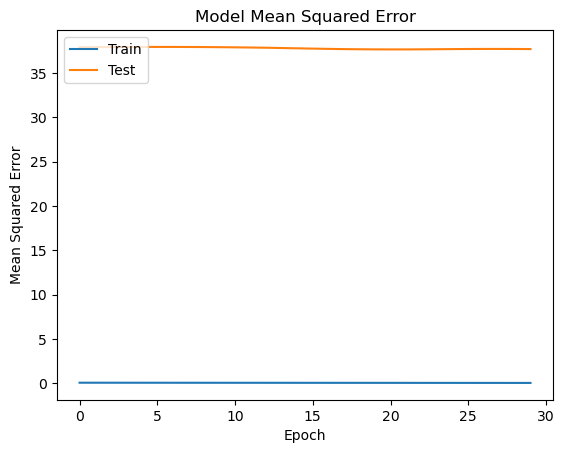

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [16]:
from pycaret.regression import *

s = setup(df, target = 'UCS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,UCS
2,Target type,Regression
3,Original data shape,"(41, 33)"
4,Transformed data shape,"(41, 33)"
5,Transformed train set shape,"(28, 33)"
6,Transformed test set shape,"(13, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [17]:
# functional API
best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0444,0.0037,0.0534,-1.4888,0.0449,0.3427,0.0370
et,Extra Trees Regressor,0.0366,0.0024,0.0449,-1.7027,0.0372,0.2673,0.0200
gbr,Gradient Boosting Regressor,0.0379,0.0025,0.0447,-2.1492,0.0370,0.3043,0.0100
dt,Decision Tree Regressor,0.0447,0.0040,0.0550,-2.5352,0.0454,0.3251,0.0050
ada,AdaBoost Regressor,0.0518,0.0042,0.0618,-3.0895,0.0525,0.4293,0.0120
lasso,Lasso Regression,0.0914,0.0128,0.1013,-3.2472,0.0868,0.6709,0.0060
llar,Lasso Least Angle Regression,0.0914,0.0128,0.1013,-3.2472,0.0868,0.6709,0.0050
dummy,Dummy Regressor,0.0943,0.0137,0.1047,-3.4167,0.0899,0.7095,0.0090
lightgbm,Light Gradient Boosting Machine,0.0943,0.0137,0.1047,-3.4167,0.0899,0.7095,0.0150
en,Elastic Net,0.0826,0.0108,0.0935,-3.8633,0.0798,0.5767,0.0050


In [18]:
print(best)


RandomForestRegressor(n_jobs=-1, random_state=123)


In [19]:
# functional API
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

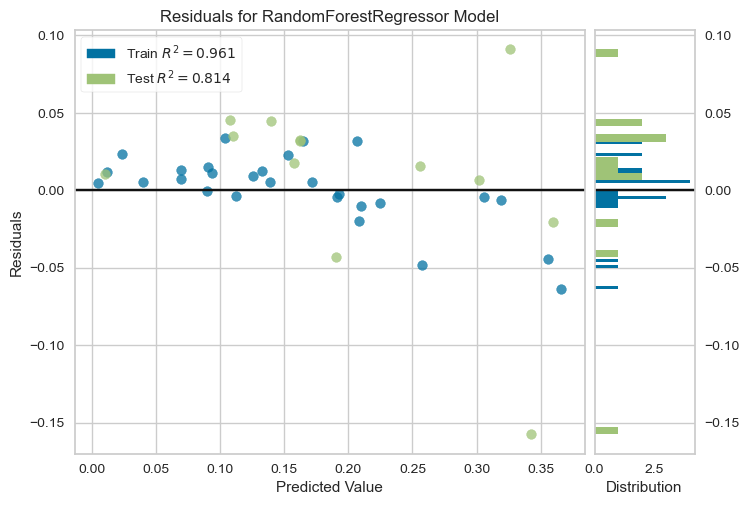

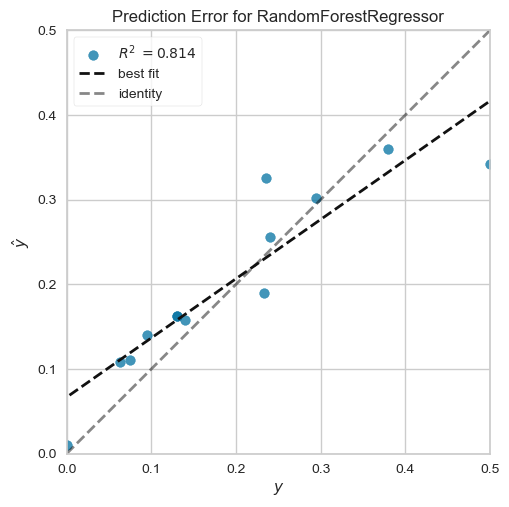

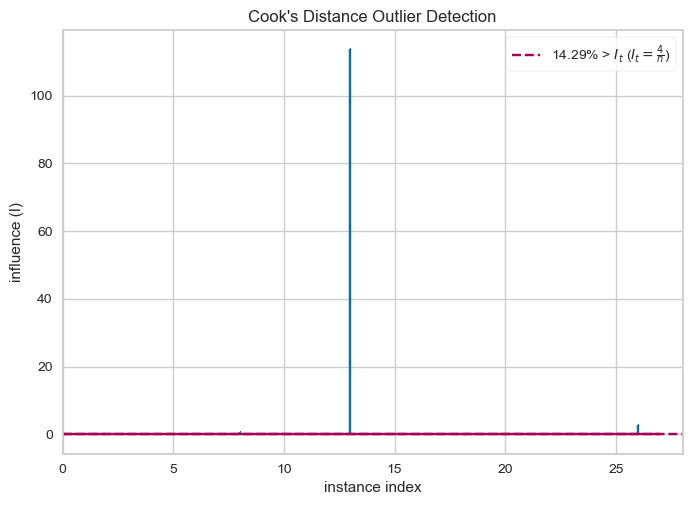

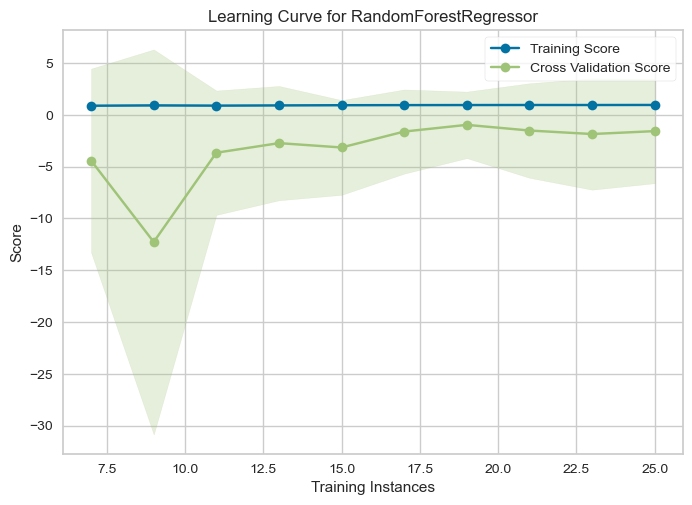

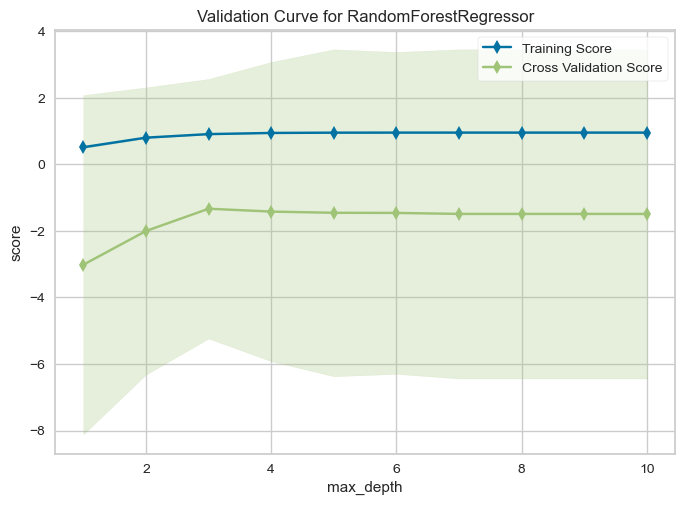

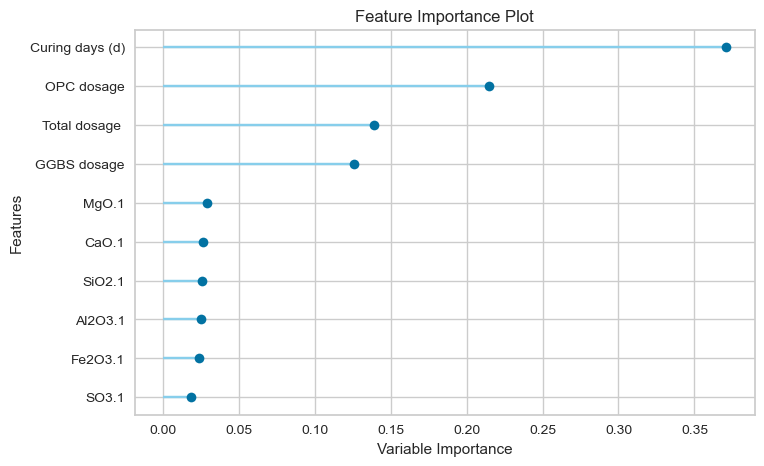

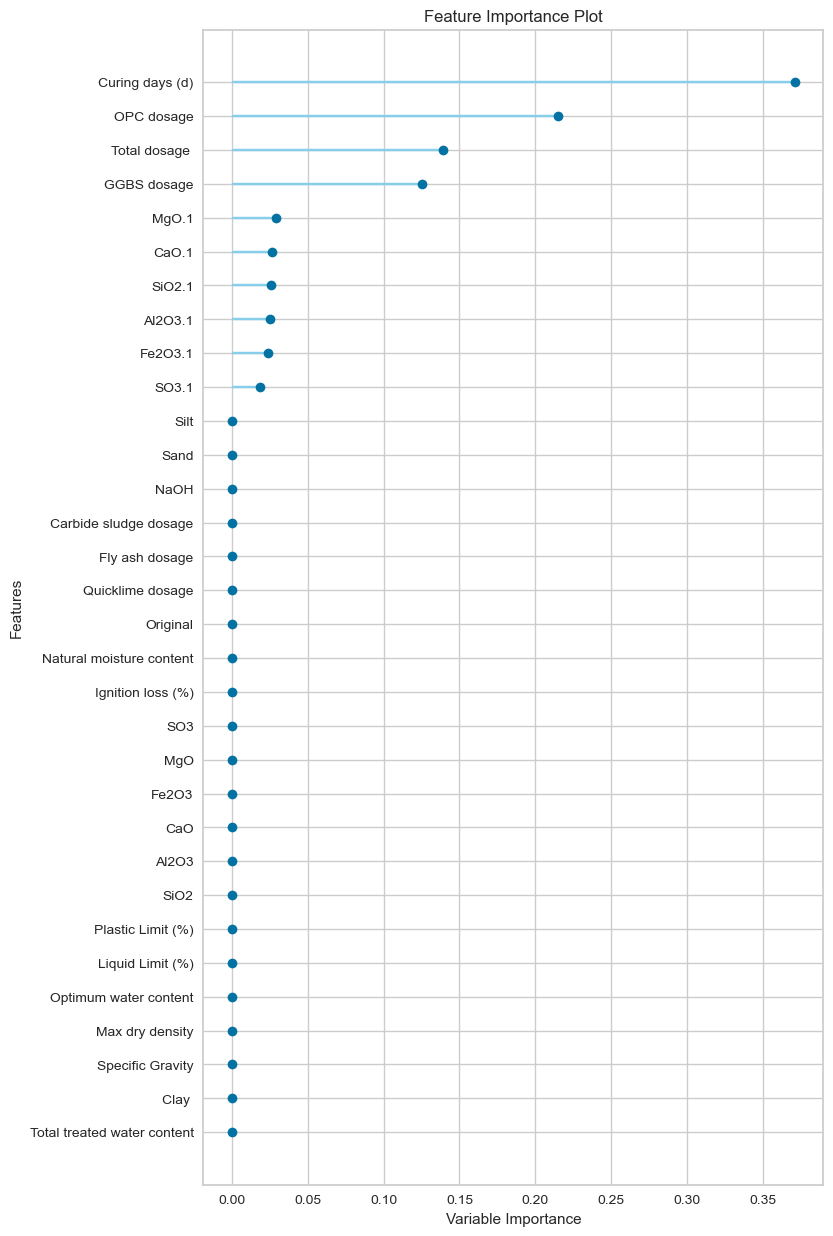

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


In [28]:
# functional API
plot_model(best, plot = 'residuals')
plot_model(best, plot = 'error')
plot_model(best, plot = 'cooks')
# plot_model(best, plot = 'rfe')
plot_model(best, plot = 'learning')
plot_model(best, plot = 'vc')
# plot_model(best, plot = 'manifold')
plot_model(best, plot = 'feature')
plot_model(best, plot = 'feature_all')
plot_model(best, plot = 'parameter')

In [23]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0425,0.0033,0.0578,0.8141,0.0442,0.2766


,Natural moisture content,Sand,Silt,Clay,Specific Gravity,Max dry density,Optimum water content,Liquid Limit (%),Plastic Limit (%),SiO2,...,SiO2.1,Al2O3.1,CaO.1,Fe2O3.1,MgO.1,SO3.1,NaOH,Curing days (d),UCS,prediction_label
28,100,0,0,0,2.72,0,0,60.0,23.6,0,...,20.777000,10.1050,48.973999,0.3430,5.1930,3.114,0,28.0,0.2400,0.255910
13,100,0,0,0,2.72,0,0,60.0,23.6,0,...,22.027500,10.7175,47.985001,0.3675,5.4975,3.300,0,7.0,0.1400,0.157725
12,100,0,0,0,2.72,0,0,60.0,23.6,0,...,23.278000,11.3300,46.995998,0.3920,5.8020,3.486,0,7.0,0.1300,0.162500
36,100,0,0,0,2.72,0,0,60.0,23.6,0,...,28.280001,13.7800,43.040001,0.4900,7.0200,4.230,0,56.0,0.2330,0.190170
11,100,0,0,0,2.72,0,0,60.0,23.6,0,...,24.528500,11.9425,46.007000,0.4165,6.1065,3.672,0,7.0,0.0950,0.139875
6,100,0,0,0,2.72,0,0,60.0,23.6,0,...,22.027500,10.7175,47.985001,0.3675,5.4975,3.300,0,7.0,0.0750,0.110310
2,100,0,0,0,2.72,0,0,60.0,23.6,0,...,27.029499,13.1675,44.028999,0.4655,6.7155,4.044,0,7.0,0.0000,0.010545
7,100,0,0,0,2.72,0,0,60.0,23.6,0,...,20.777000,10.1050,48.973999,0.3430,5.1930,3.114,0,7.0,0.0625,0.107720
40,100,0,0,0,2.72,0,0,60.0,23.6,0,...,23.278000,11.3300,46.995998,0.3920,5.8020,3.486,0,56.0,0.3800,0.359760
27,100,0,0,0,2.72,0,0,60.0,23.6,0,...,22.027500,10.7175,47.985001,0.3675,5.4975,3.300,0,28.0,0.2950,0.301790


In [24]:
save_model(best, 'DCM best pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Natural moisture content', 'Sand',
                                              'Silt', 'Clay ',
                                              'Specific Gravity',
                                              'Max dry density',
                                              'Optimum water content',
                                              'Liquid Limit (%)',
                                              'Plastic Limit (%)', 'SiO2',
                                              'Al2O3', 'CaO', 'Fe2O3', 'MgO',
                                              'SO3', 'Ignition loss (%)',
                                              'Original',
                                              'Total treated water content',
                                              'GGBS dosage', 'OPC dosag...
                                              'Total dosage ', 'SiO2.1'